In [1]:
## Import
%load_ext autoreload
%autoreload 2

In [2]:
# Module containing custom functions
import models.data as mdt

# Remove warnings display
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data and display head
trip_data_df = mdt.load_dataset_as_dataframe('data/trip-data/processed-data')

In [1]:
# Removes outliers from dataset
cleaned_df = trip_data_df[trip_data_df.speed > -10 ][trip_data_df.car_accel > -10]



NameError: name 'trip_data_df' is not defined

In [5]:
# Extracting braking events
braking_entries_df = mdt.filter_acceleration_entries(cleaned_df, threshold=-2, above=False)
braking_events = mdt.extract_events(braking_entries_df)

In [6]:
# Calculate braking events metrics
braking_event_metrics_df = mdt.get_events_metrics(braking_events)

In [7]:
from models.pipeline import BasePipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict


In [12]:
y = braking_event_metrics_df.driver_rush
X = braking_event_metrics_df.drop(columns=['driver_rush'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lr = SVC()

pipe = BasePipeline(lr)
pipe.fit(X_train, y_train)

y_hat_test = pipe.predict(X_test)

print('======================')
print('Tested Model: ', 'model')
print('======================')
print(classification_report(y_test, y_hat_test))
# print_confusion_matrix(y_test, y_hat_test)
print('\n')

# base_lr = LogisticRegression()
# base_pipe = BasePipeline(base_lr)

# scores = cross_val_score(base_pipe, X, y, cv=3, error_score='recall')
# scores

Tested Model:  model
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.00      0.00      0.00         6
         2.0       0.40      0.10      0.15        42
         3.0       0.37      0.97      0.53        63
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00        28

   micro avg       0.37      0.37      0.37       177
   macro avg       0.13      0.18      0.11       177
weighted avg       0.23      0.37      0.23       177





In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

lr = LogisticRegression()
dt_cls = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adaboost_clf = AdaBoostClassifier()
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier()
sv_clf = SVC()

In [36]:
sorted(y.unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Tested Model:  model
              precision    recall  f1-score   support

         0.0       0.14      0.08      0.10        13
         1.0       1.00      0.40      0.57         5
         2.0       0.34      0.60      0.43        25
         3.0       0.52      0.65      0.58        46
         4.0       0.12      0.08      0.10        13
         5.0       1.00      0.06      0.11        18

   micro avg       0.42      0.42      0.42       120
   macro avg       0.52      0.31      0.31       120
weighted avg       0.49      0.42      0.37       120



Tested Model:  model
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       1.00      1.00      1.00         5
         2.0       0.77      0.40      0.53        25
         3.0       0.69      0.98      0.81        46
         4.0       0.18      0.23      0.20        13
         5.0       0.00   

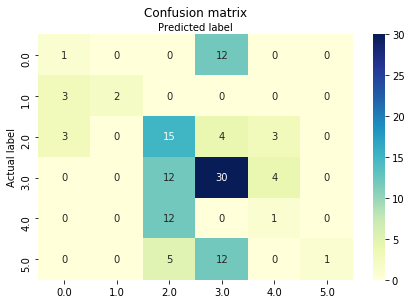

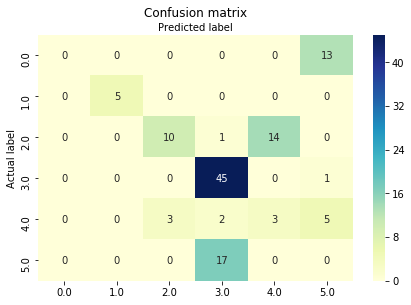

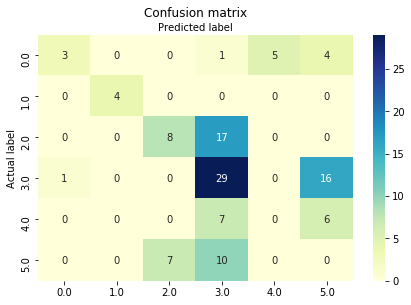

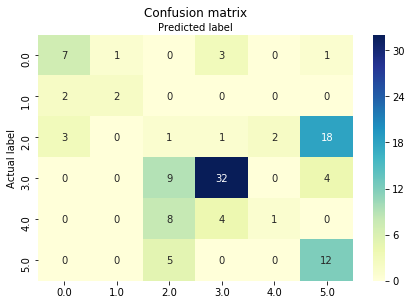

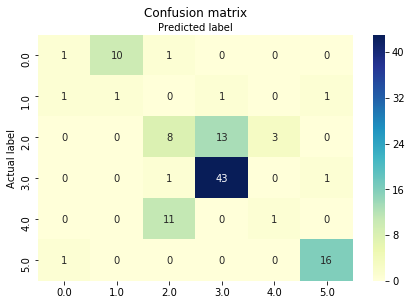

In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

classes = sorted(y.unique())
print(skf)  

for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr = LogisticRegression(penalty='l2')

    pipe = BasePipeline(lr)
    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', 'model')
    print('======================')
    print(classification_report(y_test, y_hat_test))
    mdt.print_confusion_matrix(y_test, y_hat_test, classes)
    print('\n')

In [22]:
# Changing target values to have a binary classifier
binary_y = y >= 3
binary_y = binary_y.astype(int)

5
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Tested Model:  model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.64      1.00      0.78        76

   micro avg       0.64      0.64      0.64       118
   macro avg       0.32      0.50      0.39       118
weighted avg       0.41      0.64      0.50       118



Tested Model:  model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.64      1.00      0.78        76

   micro avg       0.64      0.64      0.64       118
   macro avg       0.32      0.50      0.39       118
weighted avg       0.41      0.64      0.50       118



Tested Model:  model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.64      1.00      0.78        76

   micro avg       0.64      0.64      0.64       1

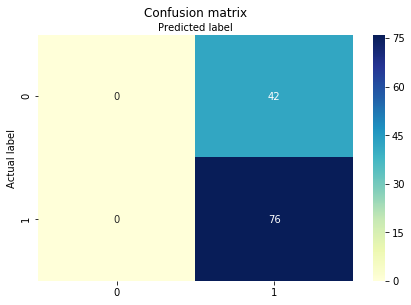

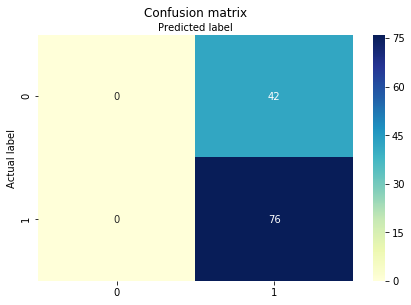

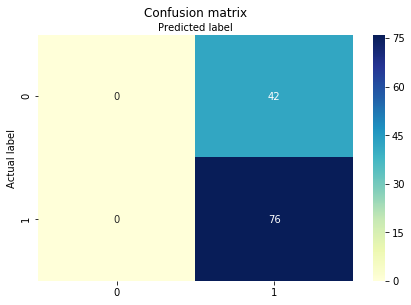

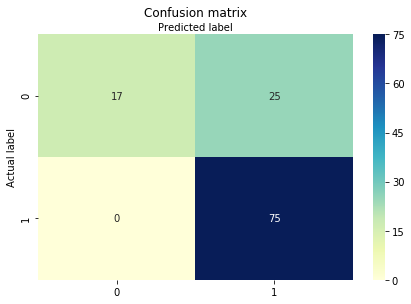

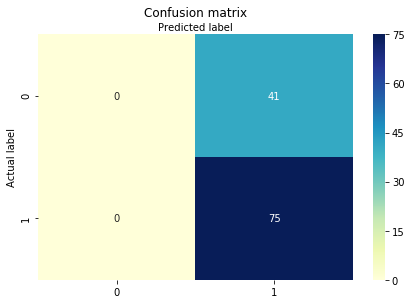

In [55]:
skf = StratifiedKFold(n_splits=5)
print(skf.get_n_splits(X, binary_y))

print(skf)

for train_index, test_index in skf.split(X, binary_y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = binary_y[train_index], binary_y[test_index]
    
    lr = AdaBoostClassifier(n_estimators=5, learning_rate=0.01)

    pipe = BasePipeline(lr)
    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', 'model')
    print('======================')
    print(classification_report(y_test, y_hat_test))
    mdt.print_confusion_matrix(y_test, y_hat_test)
    print('\n')

In [11]:
from sklearn.model_selection import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=5, random_state=42)
# kf.get_n_splits(X)

# print(kf)  

# KFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr = SVC()

    pipe = BasePipeline(lr)
    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', 'model')
    print('======================')
    print(classification_report(y_test, y_hat_test))
    # print_confusion_matrix(y_test, y_hat_test)
    print('\n')


Tested Model:  model
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         2.0       0.45      0.19      0.26        27
         3.0       0.32      0.94      0.48        35
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00         0

   micro avg       0.32      0.32      0.32       118
   macro avg       0.15      0.23      0.15       118
weighted avg       0.20      0.32      0.20       118



Tested Model:  model
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        20
         2.0       0.44      0.17      0.25        23
         3.0       0.30      1.00      0.46        32
         4.0       0.00      0.00      0.00        43
         5.0       0.00      0.00      0.00         0

   micro avg       0.31      0.31      0.31       118
   macro avg       0.15      0.23      0.14       118
weighted avg       0.17      0.31

In [32]:
# Changing target values to have a binary classifier
new_y = y >= 3
y = new_y.astype(int)

In [47]:
y.sum()/len(y)

0.6439522998296422

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lr = LogisticRegression()

pipe = BasePipeline(lr)
pipe.fit(X_train, y_train)

y_hat_test = pipe.predict(X_test)

print('======================')
print('Tested Model: ', 'model')
print('======================')
print(classification_report(y_test, y_hat_test))
# print_confusion_matrix(y_test, y_hat_test)
print('\n')

Tested Model:  model
              precision    recall  f1-score   support

           0       0.71      0.37      0.48        65
           1       0.71      0.91      0.80       112

   micro avg       0.71      0.71      0.71       177
   macro avg       0.71      0.64      0.64       177
weighted avg       0.71      0.71      0.68       177





In [48]:
from sklearn.model_selection import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4, random_state=123)
# kf.get_n_splits(X)

# print(kf)  

# KFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr = LogisticRegression()

    pipe = BasePipeline(lr)
    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', 'model')
    print('======================')
    print(classification_report(y_test, y_hat_test))
    # print_confusion_matrix(y_test, y_hat_test)
    print('\n')


Tested Model:  model
              precision    recall  f1-score   support

           0       0.40      0.25      0.31        64
           1       0.55      0.71      0.62        83

   micro avg       0.51      0.51      0.51       147
   macro avg       0.48      0.48      0.46       147
weighted avg       0.49      0.51      0.48       147



Tested Model:  model
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        45
           1       0.90      0.83      0.87       102

   micro avg       0.82      0.82      0.82       147
   macro avg       0.79      0.82      0.80       147
weighted avg       0.84      0.82      0.83       147



Tested Model:  model
              precision    recall  f1-score   support

           0       0.07      0.11      0.09        28
           1       0.77      0.69      0.73       119

   micro avg       0.58      0.58      0.58       147
   macro avg       0.42      0.40      0.41       147
weighte

In [31]:
base_lr = LogisticRegression()

estimator = BasePipeline(base_lr)

estimator.predict = pipe.predict

acc = accuracy_score(y, cross_val_predict(estimator, X, y, cv=10))
print("Accuracy:", str(round(acc*100, 2)) + "%")

AttributeError: 'NoneType' object has no attribute 'predict'

In [3]:
!pip install keras

     |████████████████████████████████| 317kB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 276kB 12.5MB/s eta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/16/27/a1/775c62ddea7bfa62324fd1f65847ed31c55dadb6051481ba3f
Successfully built pyyaml
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
